In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split


In [2]:
file_path = '../data/fire.csv'
fire_df = pd.read_csv(file_path)
fire_df.head()

,lat_bounds,lon_bounds,year,month,fraction_of_burnable_area,burned_area,CL
0,52.0,-10.00,2010,6,0.805087,0.0,1
1,52.0,-9.75,2010,6,0.937479,0.0,0
2,52.0,-9.50,2010,6,0.998650,0.0,1
3,52.0,-9.25,2010,6,0.996290,0.0,1
4,52.0,-9.00,2010,6,0.979073,0.0,1


In [3]:
fire_df['month'].unique()

array([6, 4, 5, 7])

this datasets probably start months with 0 not 1 for January so I need to add one to the column month

In [4]:
fire_df['month'] = fire_df['month'] + 1
fire_df.head()

,lat_bounds,lon_bounds,year,month,fraction_of_burnable_area,burned_area,CL
0,52.0,-10.00,2010,7,0.805087,0.0,1
1,52.0,-9.75,2010,7,0.937479,0.0,0
2,52.0,-9.50,2010,7,0.998650,0.0,1
3,52.0,-9.25,2010,7,0.996290,0.0,1
4,52.0,-9.00,2010,7,0.979073,0.0,1


In [5]:
fire_df['month'].unique()

array([7, 5, 6, 8])

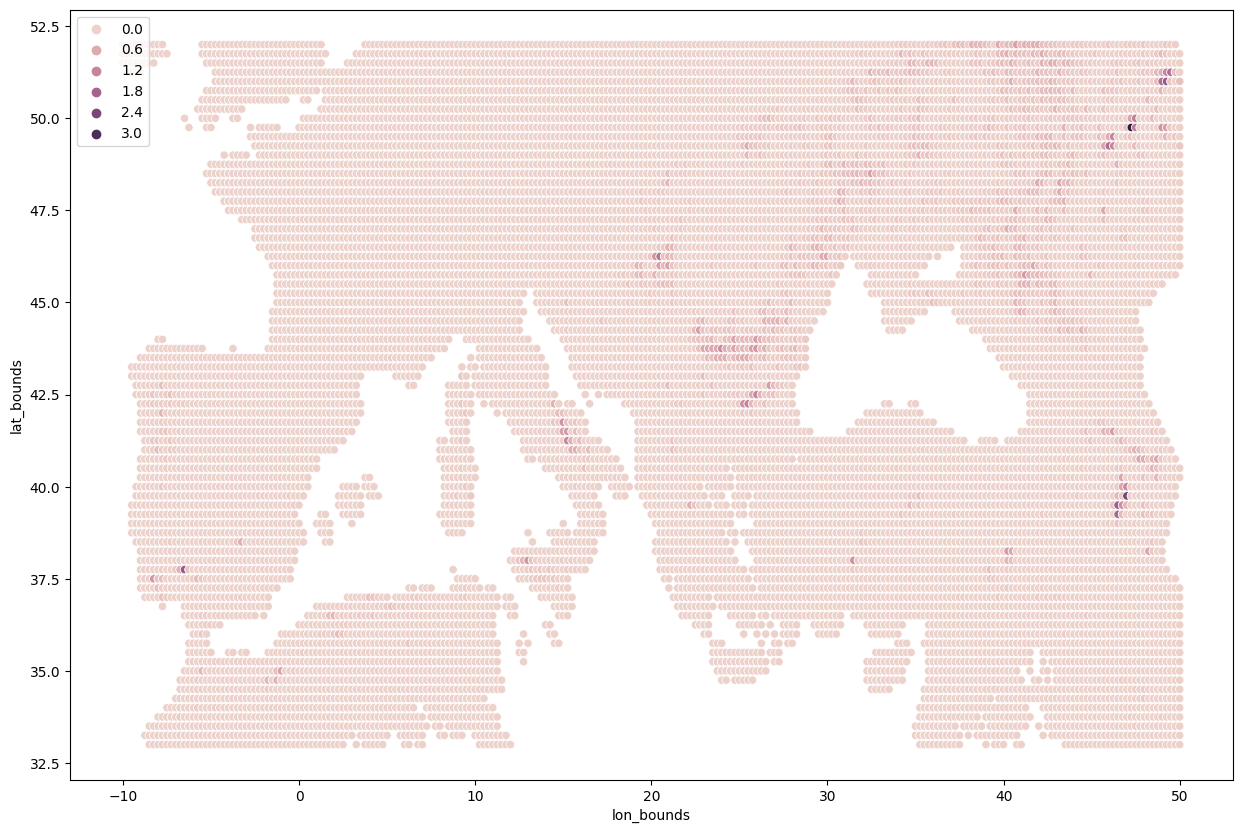

In [34]:
month = 8
year = 2004

fire_df_plotting = fire_df[(fire_df['month'] == month) & (fire_df['year'] == year)]
plt.figure(figsize=(15,10))
sns.scatterplot(data=fire_df_plotting, x='lon_bounds', y='lat_bounds', hue = 'burned_area')
plt.legend(loc='upper left');

In [8]:
climate_df = pd.read_csv('../data/climate.csv')
climate_df.head()

,Unnamed: 0,lon,lat,year,tas_5,tasmax_5,pr_5,tas_6,tasmax_6,pr_6,tas_7,tasmax_7,pr_7,tas_8,tasmax_8,pr_8
0,0,-10.0,33.00,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,-10.0,33.25,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,-10.0,33.50,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,-10.0,33.75,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,-10.0,34.00,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
climate_df.shape

(352583, 16)

In [10]:
climate_df = climate_df.dropna().drop('Unnamed: 0', axis =1)

import pandas as pd

# assuming your data is stored in a variable named df
climate_df = pd.melt(climate_df, id_vars=['lon', 'lat', 'year'], var_name='variable', value_name='value')
climate_df[['variable', 'month']] = climate_df['variable'].str.extract('(\D+)(\d+)', expand=True)
climate_df['month'] = climate_df['month'].astype(int)
climate_df = climate_df.pivot_table(index=['lon', 'lat', 'year', 'month'], columns='variable', values='value').reset_index()
climate_df.columns.name = None
climate_df.rename(columns=lambda x: x.rstrip('_'), inplace=True)

climate_df

,lon,lat,year,month,pr,tas,tasmax
0,-10.0,51.75,2001,5,39.000000,12.300000,16.500000
1,-10.0,51.75,2001,6,59.900000,13.400001,17.000000
2,-10.0,51.75,2001,7,79.000000,15.300000,18.800001
3,-10.0,51.75,2001,8,102.100000,15.300000,18.900000
4,-10.0,51.75,2002,5,153.700000,11.300000,14.800000
...,...,...,...,...,...,...,...
1056395,50.0,52.00,2018,8,8.300000,21.500000,28.500000
1056396,50.0,52.00,2019,5,29.500000,18.800001,25.200000
1056397,50.0,52.00,2019,6,22.800001,22.400000,29.300001
1056398,50.0,52.00,2019,7,40.500000,22.400000,28.600000


In [11]:
fire_climate = fire_df.merge(
    climate_df,
    left_on=['lat_bounds', 'lon_bounds', 'year', 'month'],
    right_on=['lat', 'lon', 'year', 'month']
    )

fire_climate = fire_climate.drop(['lat', 'lon'], axis =1)
fire_climate

,lat_bounds,lon_bounds,year,month,fraction_of_burnable_area,burned_area,CL,pr,tas,tasmax
0,52.0,-10.00,2010,7,0.805087,0.0,1,131.5,15.7,18.800001
1,52.0,-9.75,2010,7,0.937479,0.0,0,168.1,14.6,17.400000
2,52.0,-9.50,2010,7,0.998650,0.0,1,168.1,14.6,17.400000
3,52.0,-9.25,2010,7,0.996290,0.0,1,165.5,14.5,17.600000
4,52.0,-9.00,2010,7,0.979073,0.0,1,165.5,14.5,17.600000
...,...,...,...,...,...,...,...,...,...,...
1937607,33.0,49.00,2019,7,0.929567,0.0,1,0.3,33.8,43.400000
1937608,33.0,49.25,2019,7,0.979612,0.0,1,1.6,30.1,39.300000
1937609,33.0,49.50,2019,7,0.912257,0.0,1,1.6,30.1,39.300000
1937610,33.0,49.75,2019,7,0.983409,0.0,1,1.7,26.2,35.200000


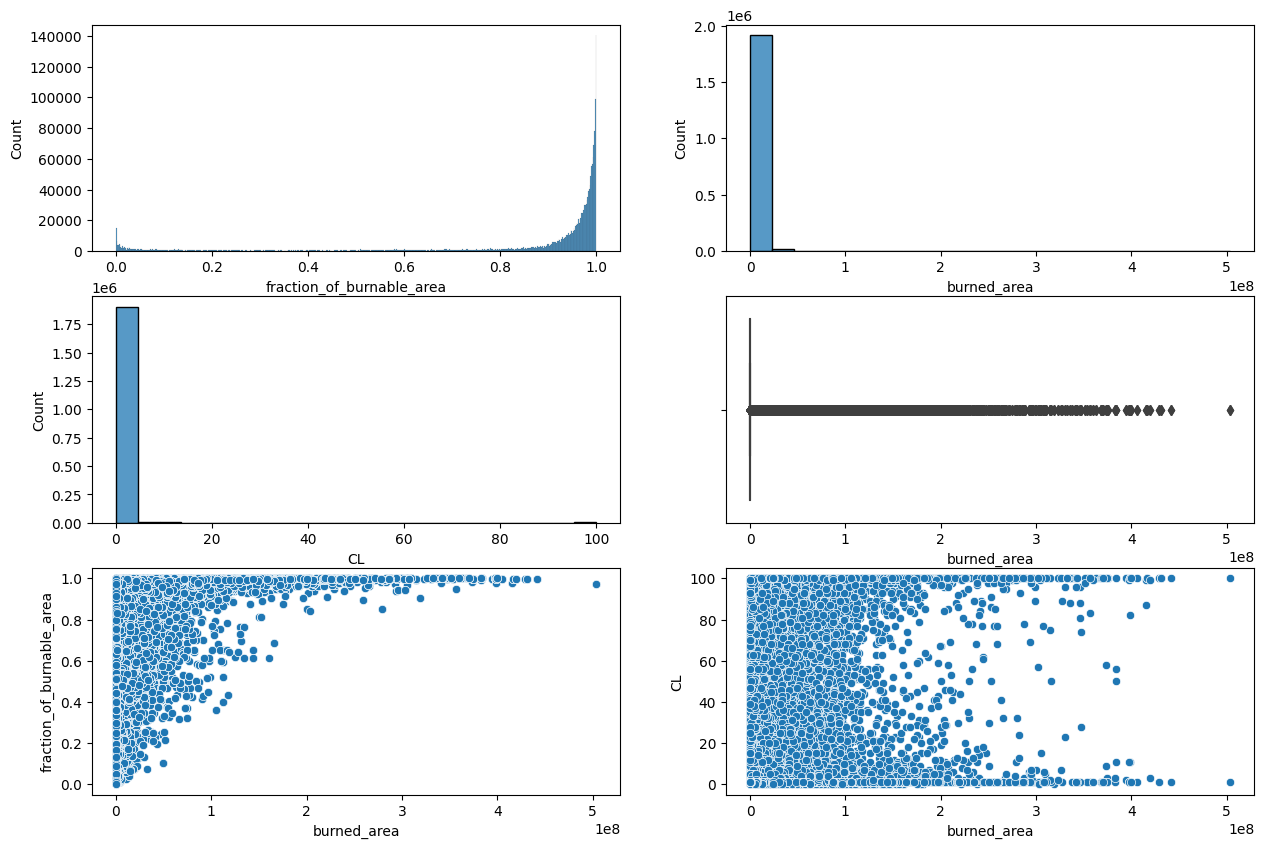

In [17]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 10))

sns.histplot(fire_climate['fraction_of_burnable_area'], ax=ax1)
sns.histplot(fire_climate['burned_area'], ax=ax2)
sns.histplot(fire_climate['CL'], ax=ax3)
sns.boxplot(data = fire_climate, x= 'burned_area', ax=ax4)
sns.scatterplot(data=fire_climate, x='burned_area', y='fraction_of_burnable_area', ax=ax5)
sns.scatterplot(data=fire_climate, x='burned_area', y='CL', ax=ax6)

plt.show();


 # filtering dataset

1. seems there is one outlier in burned area 
2. the distribution for 'fraction_of_burnable_area' is skewd and data wit less than 80% could be removed

In [64]:
fire_climate_filtered = fire_climate[fire_climate['fraction_of_burnable_area'] > 0.8]
#mask = (fire_climate_filtered['CL'] > 50) # keeps only pixels where confidance that burning is real is abou 50%
#fire_climate_filtered = fire_climate_filtered[mask].reset_index(drop=True)

fire_climate_filtered = fire_climate_filtered[fire_climate_filtered['CL'] > 50]
fire_climate_filtered.shape

(6606, 10)

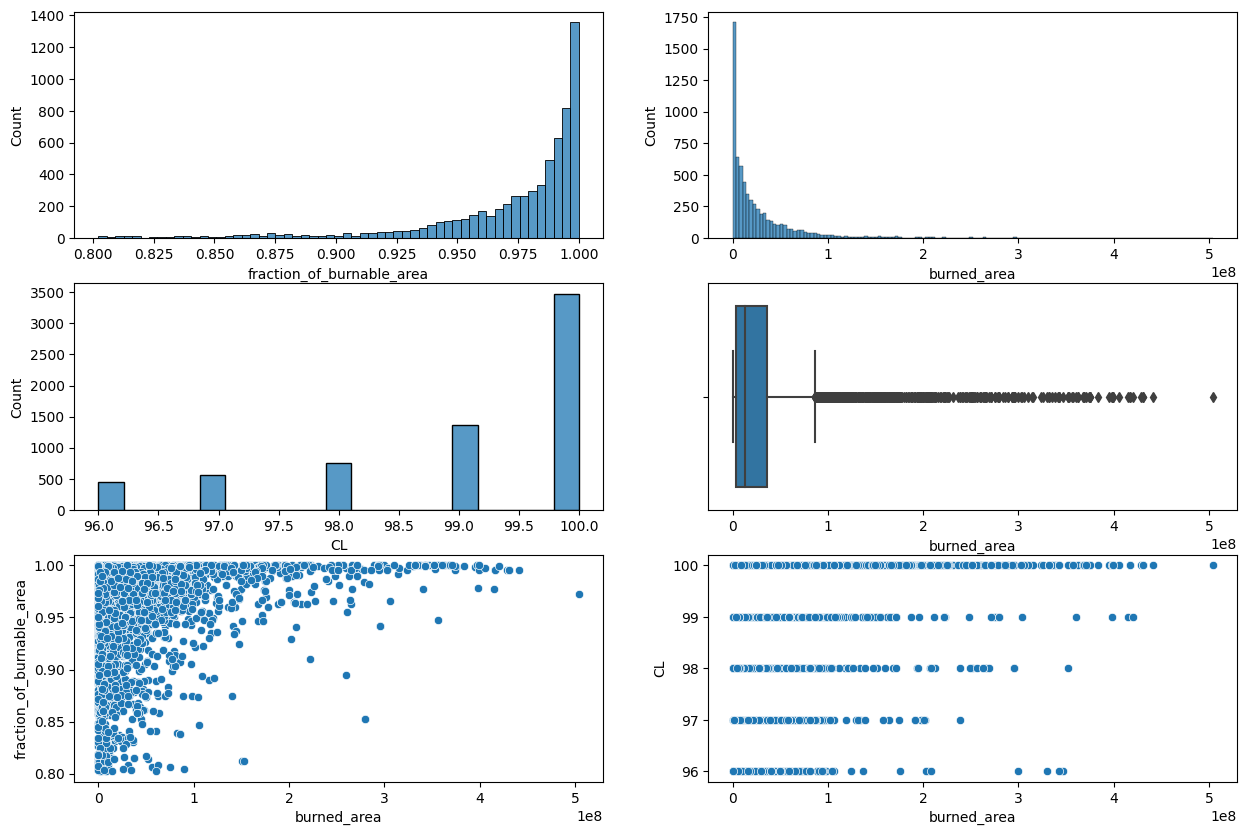

In [65]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 10))

sns.histplot(fire_climate_filtered['fraction_of_burnable_area'], ax=ax1)
sns.histplot(fire_climate_filtered['burned_area'], ax=ax2)
sns.histplot(fire_climate_filtered['CL'], ax=ax3)
sns.boxplot(data = fire_climate_filtered, x= 'burned_area', ax=ax4)
sns.scatterplot(data=fire_climate_filtered, x='burned_area', y='fraction_of_burnable_area', ax=ax5)
sns.scatterplot(data=fire_climate_filtered, x='burned_area', y='CL', ax=ax6)

plt.show();

I would not remove more of the burned area 'outliers' since the outliers are what we are actually looking for

# Splitting the data

In [39]:
y = fire_climate_filtered['burned_area']
X = fire_climate_filtered.drop('burned_area', axis=1)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)

X_train:  (10714, 9)
y_train:  (10714,)


# Normalisation

## longitude and latitude

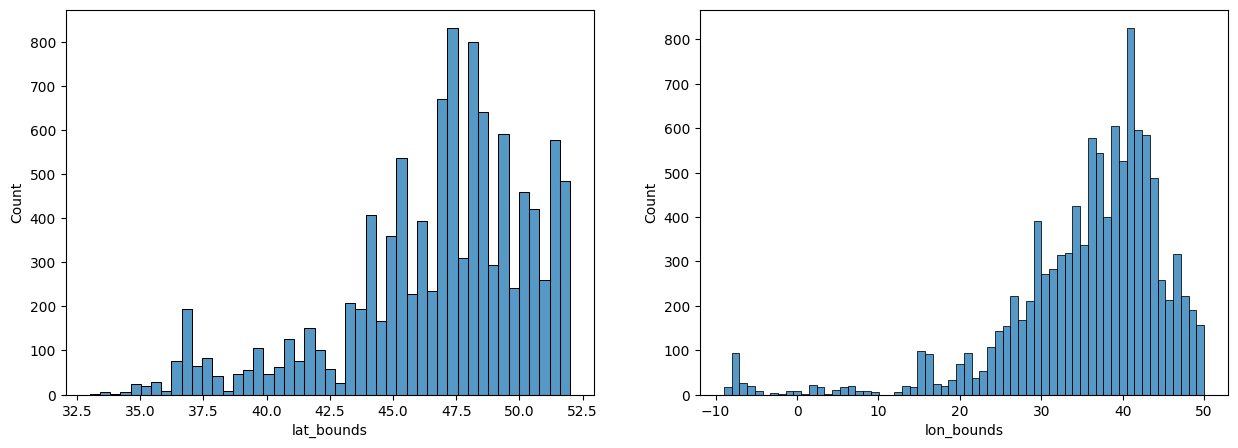

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(X_train['lat_bounds'], ax= ax1)
sns.histplot(X_train['lon_bounds'], ax= ax2);

the lon and lat columns need normalising but I am not sure what is the best approach.<br />
ChatGPT recommended to map longitude and latitude to x and y coordinates -> represents the data in a two-dimensional space

x = cos(lat) * cos(lon) <br />
y = cos(lat) * sin(lon)

In [45]:
X_train['x'] = np.cos(X_train['lat_bounds']) * np.cos(X_train['lon_bounds'])
X_train['y'] = np.cos(X_train['lat_bounds']) * np.sin(X_train['lon_bounds'])
X_train = X_train.drop(['lat_bounds', 'lon_bounds'], axis =1).reset_index(drop = True)

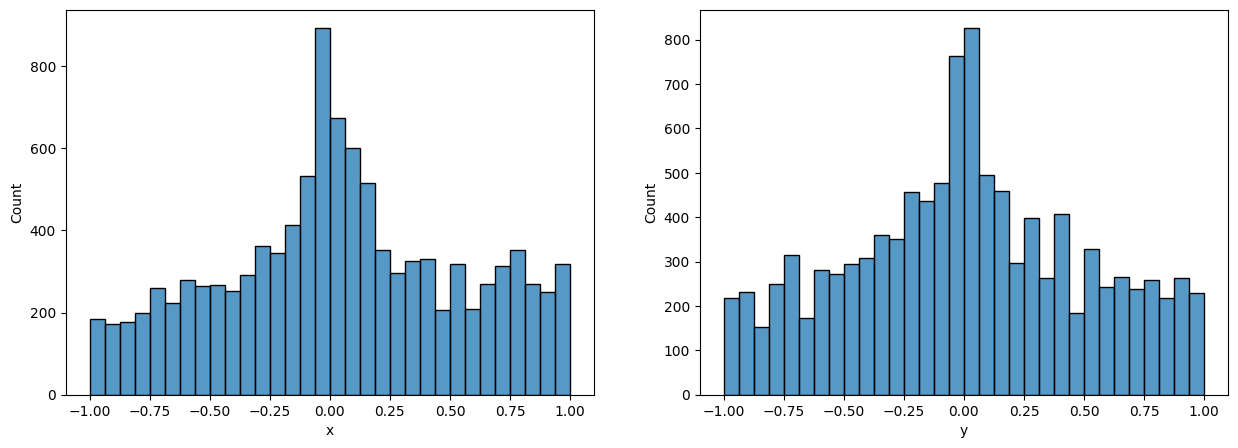

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(X_train['x'], ax= ax1)
sns.histplot(X_train['y'], ax= ax2);

this seems better, both coordinates have normal distribution

In [47]:
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)

X_train:  (10714, 9)
y_train:  (10714,)


## time columns

In [48]:
# we have only one month atm so I am dropping it for now
X_train = X_train.drop('month', axis=1)

In [49]:
# for now I am treating year as ordinal value. We will need to discuss how to treat it properly later
o_encoder = OrdinalEncoder(categories = [[2001, 2002, 2003, 2004, 2005,
                                         2006, 2007, 2008, 2009, 2010,
                                         2011, 2012, 2013, 2014, 2015, 
                                         2016, 2017, 2018, 2019]])

o_encoder.fit(X_train[['year']])
X_train['year'] = o_encoder.transform(X_train[['year']])

X_train.head()

,year,fraction_of_burnable_area,CL,pr,tas,tasmax,x,y
0,0.0,0.993455,81,24.100000,23.200000,29.4,0.174445,-0.495512
1,15.0,0.941218,77,48.100002,20.800001,28.2,-0.690435,-0.499305
2,17.0,0.836566,78,5.200000,24.900000,31.5,-0.019749,-0.991862
3,13.0,0.987628,100,35.000000,25.000000,31.7,0.120180,0.154371
4,5.0,0.985572,100,13.900001,25.000000,31.9,0.465399,0.753842


# climate data

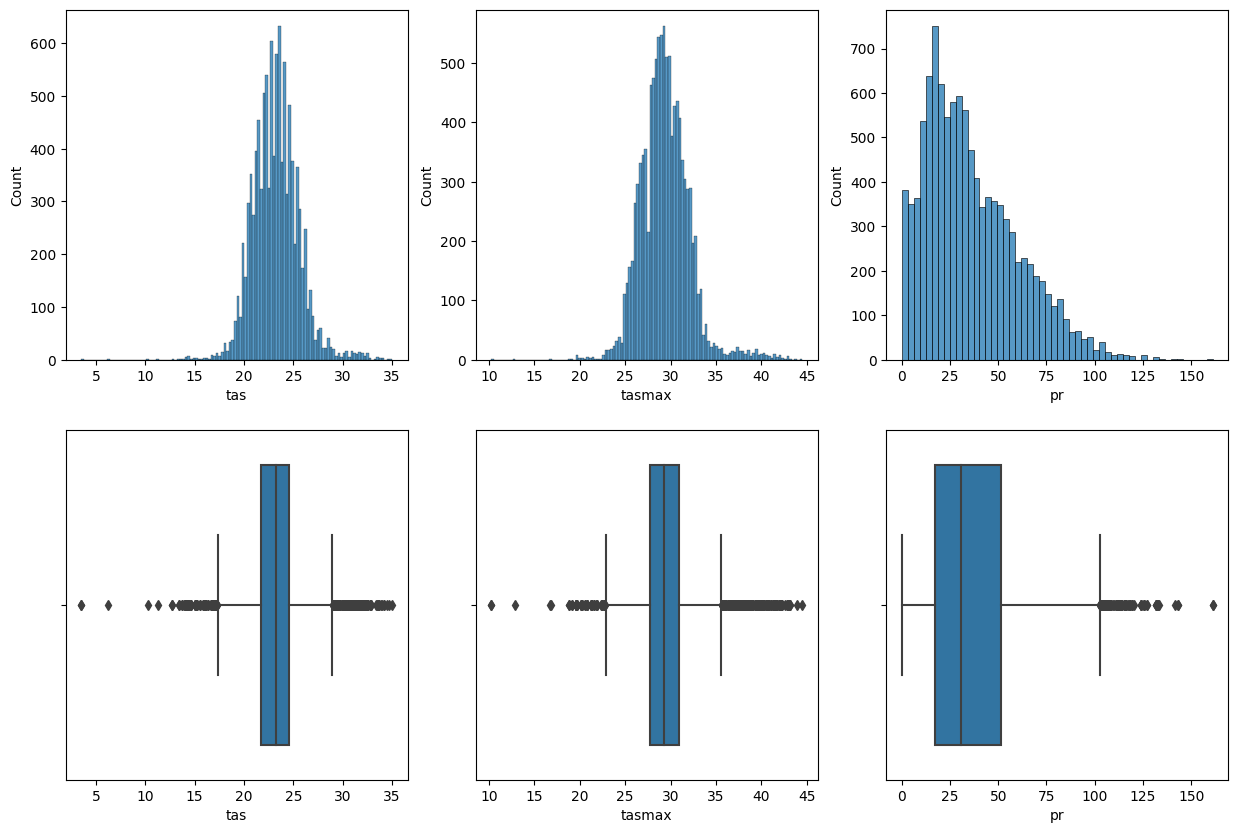

In [50]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 10))
sns.histplot(X_train['tas'], ax= ax1)
sns.histplot(X_train['tasmax'], ax= ax2)
sns.histplot(X_train['pr'], ax= ax3)


sns.boxplot(data = X_train, x= 'tas', ax=ax4)
sns.boxplot(data = X_train, x= 'tasmax', ax=ax5)
sns.boxplot(data = X_train, x= 'pr', ax=ax6);

tas and maxtas seem to have normal distribution but there are some outliers so I am using RobustScaler on all three

In [51]:
rb_scaler = RobustScaler()
X_train[['tas', 'tasmax', 'pr']] = rb_scaler.fit_transform(X_train[['tas', 'tasmax', 'pr']])

X_train.head()

,year,fraction_of_burnable_area,CL,pr,tas,tasmax,x,y
0,0.0,0.993455,81,-0.198830,0.000000,0.03125,0.174445,-0.495512
1,15.0,0.941218,77,0.502924,-0.827586,-0.34375,-0.690435,-0.499305
2,17.0,0.836566,78,-0.751462,0.586207,0.68750,-0.019749,-0.991862
3,13.0,0.987628,100,0.119883,0.620690,0.75000,0.120180,0.154371
4,5.0,0.985572,100,-0.497076,0.620690,0.81250,0.465399,0.753842


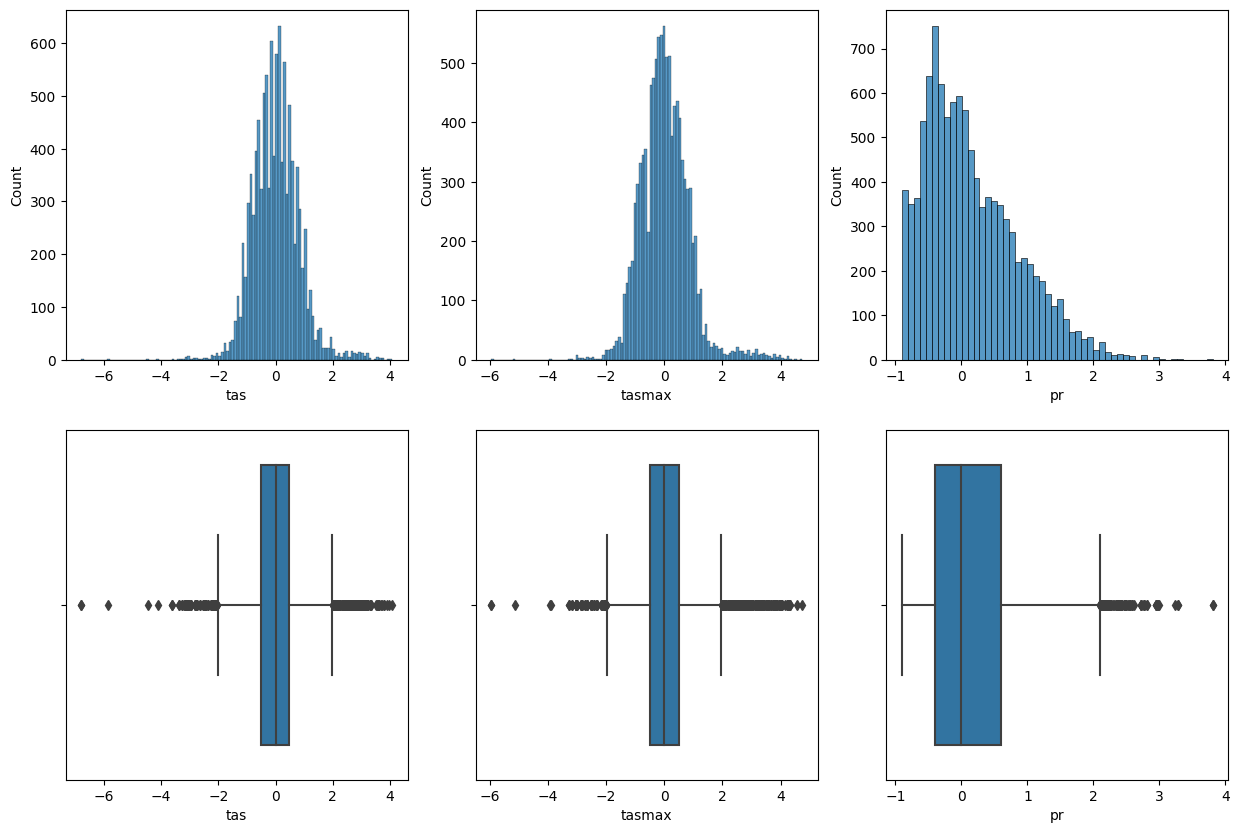

In [52]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 10))
sns.histplot(X_train['tas'], ax= ax1)
sns.histplot(X_train['tasmax'], ax= ax2)
sns.histplot(X_train['pr'], ax= ax3)


sns.boxplot(data = X_train, x= 'tas', ax=ax4)
sns.boxplot(data = X_train, x= 'tasmax', ax=ax5)
sns.boxplot(data = X_train, x= 'pr', ax=ax6);

data is rescaled

# fire data

### fraction_of_burnable_area
this is already in a range of 0 - 1

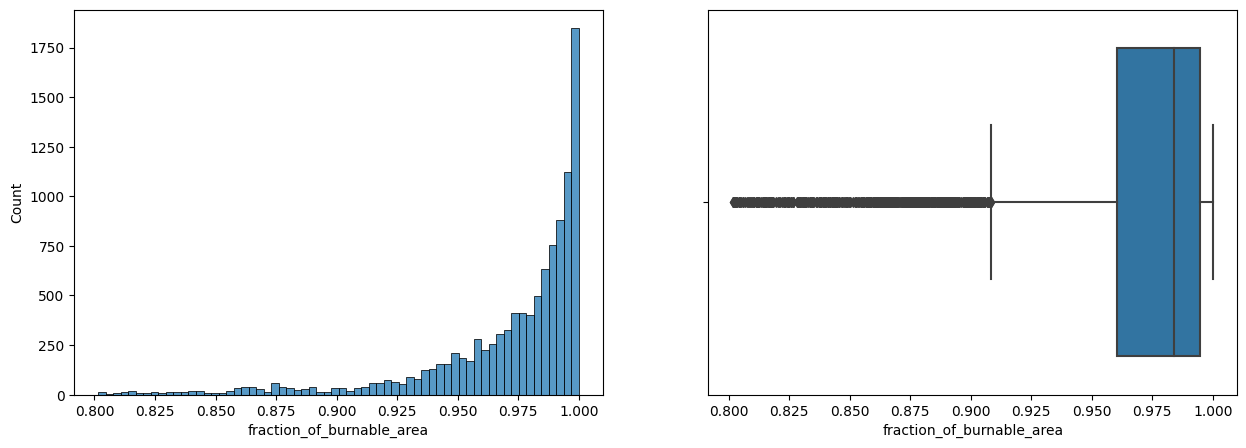

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(X_train['fraction_of_burnable_area'], ax= ax1)
sns.boxplot(data = X_train, x= 'fraction_of_burnable_area', ax=ax2);

the distribution is not normal and there are outliers. I will perform Robust Scaer as well but not sure whether this is neccessary

In [54]:
rb_scaler2 = RobustScaler()
X_train[['fraction_of_burnable_area']] = rb_scaler.fit_transform(X_train[['fraction_of_burnable_area']])

X_train.head()

,year,fraction_of_burnable_area,CL,pr,tas,tasmax,x,y
0,0.0,0.281121,81,-0.198830,0.000000,0.03125,0.174445,-0.495512
1,15.0,-1.232226,77,0.502924,-0.827586,-0.34375,-0.690435,-0.499305
2,17.0,-4.264078,78,-0.751462,0.586207,0.68750,-0.019749,-0.991862
3,13.0,0.112322,100,0.119883,0.620690,0.75000,0.120180,0.154371
4,5.0,0.052754,100,-0.497076,0.620690,0.81250,0.465399,0.753842


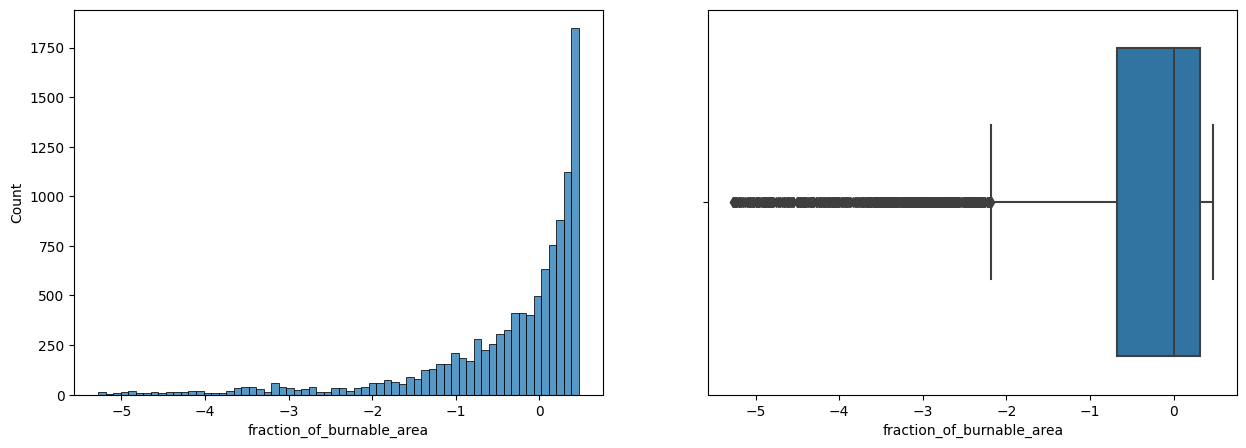

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(X_train['fraction_of_burnable_area'], ax= ax1)
sns.boxplot(data = X_train, x= 'fraction_of_burnable_area', ax=ax2);

### confidance of pixel actually burning

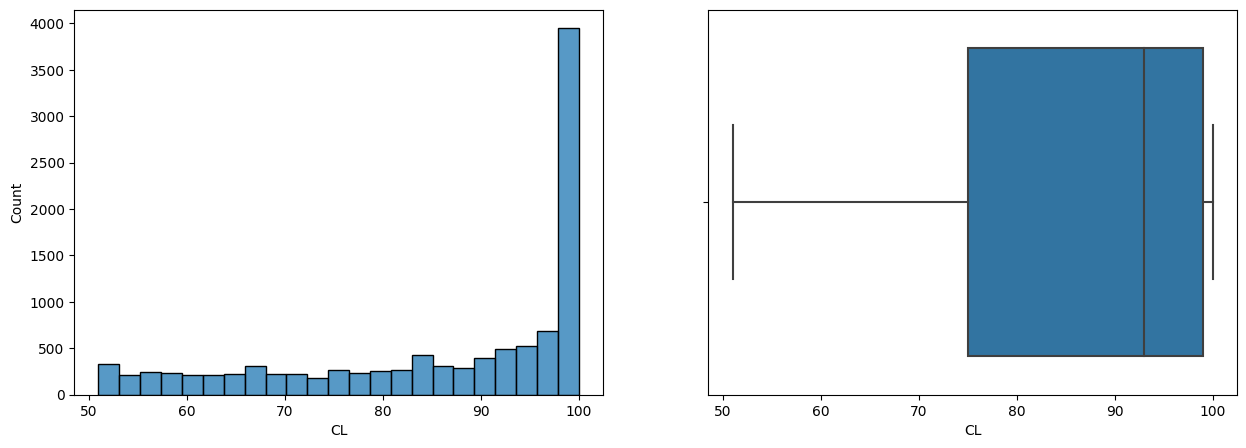

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(X_train['CL'], ax= ax1)
sns.boxplot(data = X_train, x= 'CL', ax=ax2);

no outliers but also not a normal distribution so I am using MinMaxScaler

In [59]:
mm_scaler = MinMaxScaler()

X_train[['CL']] = rb_scaler.fit_transform(X_train[['CL']])
X_train.head()

,year,fraction_of_burnable_area,CL,pr,tas,tasmax,x,y
0,0.0,0.281121,-0.500000,-0.198830,0.000000,0.03125,0.174445,-0.495512
1,15.0,-1.232226,-0.666667,0.502924,-0.827586,-0.34375,-0.690435,-0.499305
2,17.0,-4.264078,-0.625000,-0.751462,0.586207,0.68750,-0.019749,-0.991862
3,13.0,0.112322,0.291667,0.119883,0.620690,0.75000,0.120180,0.154371
4,5.0,0.052754,0.291667,-0.497076,0.620690,0.81250,0.465399,0.753842


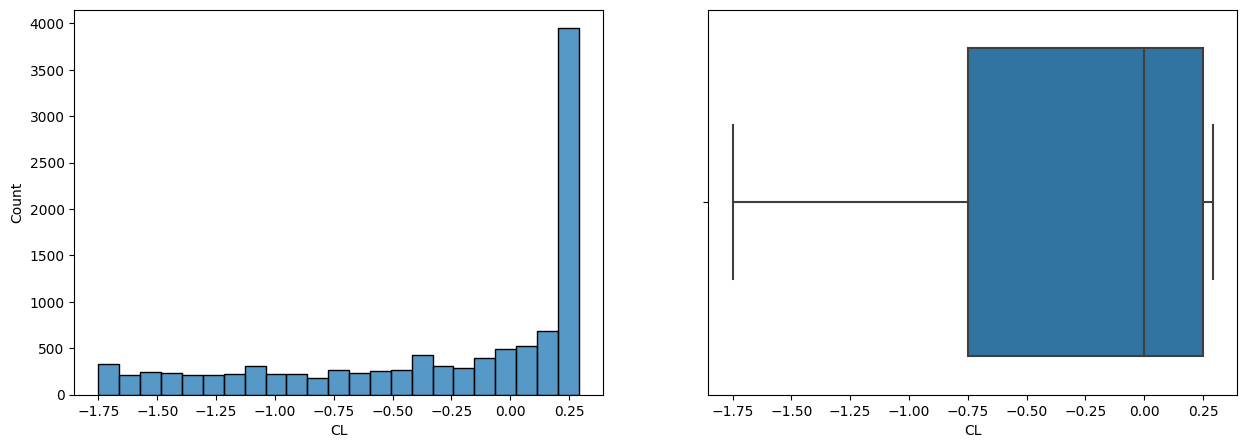

In [60]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(X_train['CL'], ax= ax1)
sns.boxplot(data = X_train, x= 'CL', ax=ax2);

### burned area

In [56]:
y_train.head()

62597      21519532.0
173057            0.0
1180937    24685748.0
1132304    32950106.0
242914     96381740.0
Name: burned_area, dtype: float64

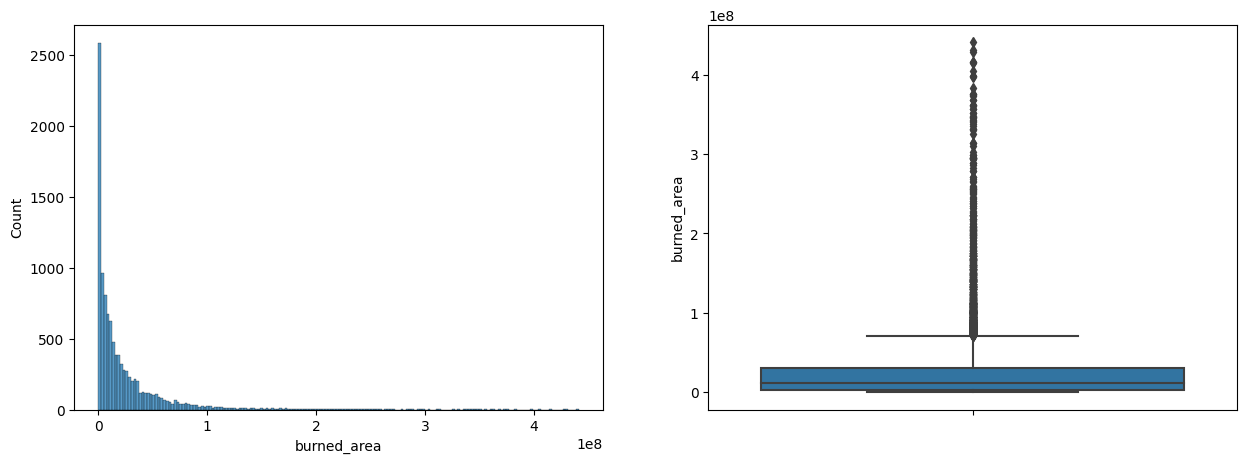

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(y_train, ax=ax1)
sns.boxplot(y=y_train, ax=ax2);

distribution is not normal and there are outliers but this is to be expected from th data and I dont know whether it should be treated

In [ ]:
#def pivot_fire(fire_df):
#    
#    df_pivoted = pd.pivot_table(fire_df, 
#                                index=['lat_bounds', 'lon_bounds', 'year'],
#                                columns='month', 
#                                values=['fraction_of_burnable_area', 'burned_area', 'CL'])
#
#    new_columns = []
#    for month in range(5, 9):
#        new_columns.extend([f'{month}_fraction', f'{month}_burned', f'{month}_CL'])
#    df_pivoted.columns = new_columns
#    df_pivoted = df_pivoted.reset_index()
#
#    return df_pivoted

In [ ]:
#fire_pivoted = pivot_fire(fire_df)
#fire_pivoted.head()